# 이변량 분석 (1)

* 두 변수의 관계를 분석한다.

### 1) 숫자 vs 숫자

* 숫자형 변수끼리 비교할 때 중요한 관점 '직선'

> 시각화 : 산점도  
> 수치화(가설검정 도구) : 상관분석

In [2]:
# 라이브러리 불러오기

import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!
import scipy.stats as spst

# 데이터 불러오기
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv')
iris = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/iris.csv')
boston = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston2_NA.csv')
air = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv')

* 산점도

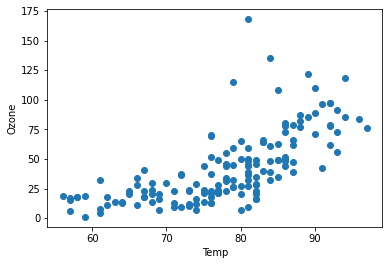

In [3]:
# Temp, Ozone과의 관계 시각화
plt.scatter(air['Temp'], air['Ozone'])
plt.xlabel('Temp')
plt.ylabel('Ozone')
plt.show()

> Temp와 Ozone 간에 양의 상관관계가 있다.  
> Temp가 올라갈 수록 Ozone의 Range가 넓어진다.

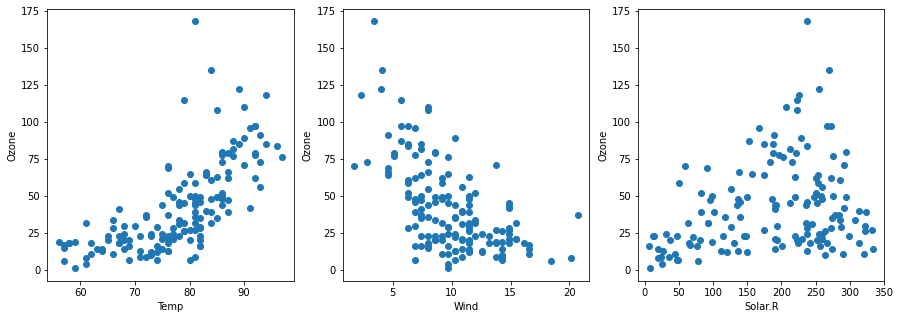

In [4]:
# Temp, Wind, Solar.R과 Ozone 과의 관계를 시각화
plt.figure(figsize = (15,5))
plt.subplot(1, 3, 1)
plt.scatter(air['Temp'], air['Ozone'])
plt.xlabel('Temp')
plt.ylabel('Ozone')

plt.subplot(1, 3, 2)
plt.scatter(air['Wind'], air['Ozone'])
plt.xlabel('Wind')
plt.ylabel('Ozone')

plt.subplot(1, 3, 3)
plt.scatter(air['Solar.R'], air['Ozone'])
plt.xlabel('Solar.R')
plt.ylabel('Ozone')

plt.show()

> 여러 변수들 중에서 Temp가 가장 직선에 가까운 형태이므로,  
> Ozone과 가장 강한 관계의 변수이다.

* jointplot : scatter + histogram(혹은 density plot)
> 산점도와 각각의 히스토그램을 함께 보여준다.

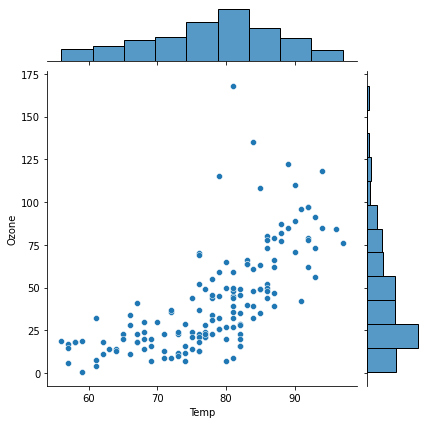

In [5]:
sns.jointplot(x='Temp', y='Ozone', data=air)
plt.show()

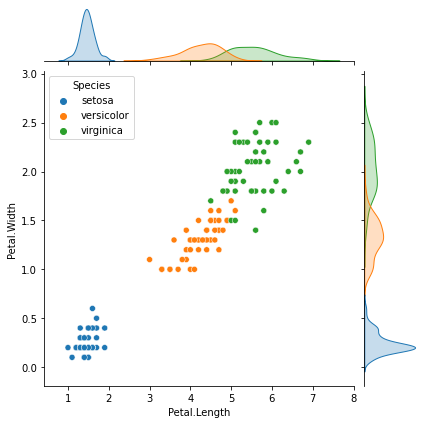

In [7]:
# hue 옵션으로 범주 차원의 그래프를 볼 수 있다.
sns.jointplot(x='Petal.Length', y='Petal.Width', data = iris, hue = 'Species')
plt.show()

* pairplot : scatter + histogram(혹은 density plot) 확장
> 숫자형 변수들에 대한 산점도를 한꺼번에 그려준다.

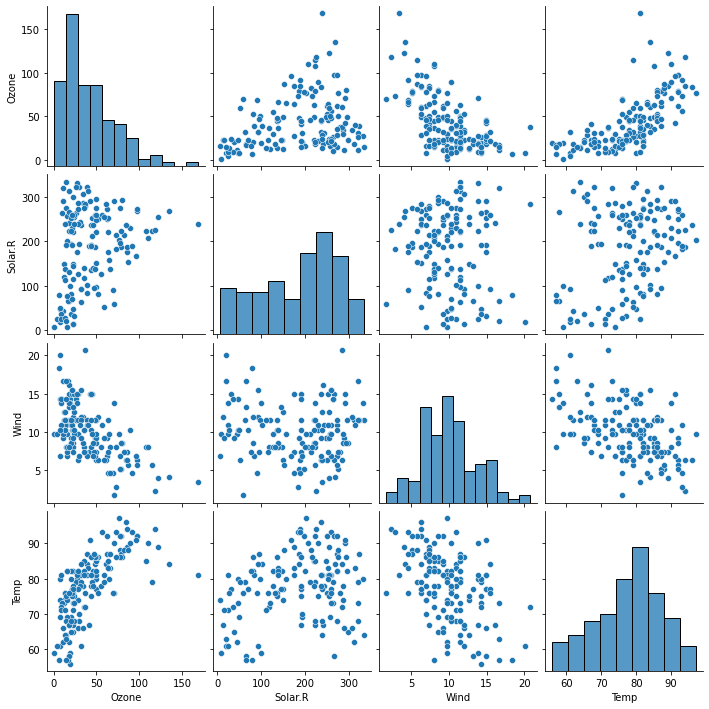

In [6]:
sns.pairplot(air)
plt.show()

* 상관분석
    > 그래프의 직선(EDA)이 불분명할 때, 상관분석(CDA)을 한다.  
    > 상관계수 : 직선을 수치화한 계수, 절대값이 1에 가까울수록 직선  
    > p-value : 채택한 대립가설이 틀릴 확률, 0.05 미만이면 대립가설이 참

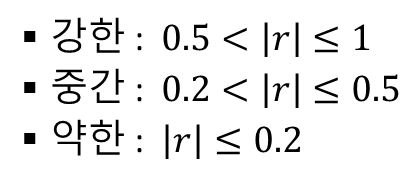

In [11]:
# 데이터프레임으로 부터 상관계수 구하기
air.corr()

,Ozone,Solar.R,Wind,Temp
Ozone,1.000000,0.280068,-0.605478,0.683372
Solar.R,0.280068,1.000000,-0.056792,0.275840
Wind,-0.605478,-0.056792,1.000000,-0.457988
Temp,0.683372,0.275840,-0.457988,1.000000


In [12]:
# Temp, Wind, Solar.R 과 Ozone과의 관계를 수치화

print('Temp -> Ozone 상관계수: {}, pvalue : {}'.format(spst.pearsonr(air['Temp'], air['Ozone'])[0],spst.pearsonr(air['Temp'], air['Ozone'])[1]))
print('Wind -> Ozone 상관계수: {}, pvalue : {}'.format(spst.pearsonr(air['Wind'], air['Ozone'])[0],spst.pearsonr(air['Wind'], air['Ozone'])[1]))

# pearsonr 함수를 사용할 때 결측치를 먼저 처리해야 한다.
air2 = air.loc[air['Solar.R'].notnull()]
print('Solar.R -> Ozone 상관계수: {}, pvalue: {}'.format(spst.pearsonr(air2['Solar.R'], air2['Ozone'])[0], spst.pearsonr(air2['Solar.R'], air2['Ozone'])[1]))

Temp -> Ozone 상관계수: 0.6833717861490114, pvalue : 2.197769800200274e-22
Wind -> Ozone 상관계수: -0.6054782354684075, pvalue : 1.1255146087638192e-16
Solar.R -> Ozone 상관계수: 0.2800681334905377, pvalue: 0.0006175878788566531


> * Temp와 Ozone  
> p-value가 0에 수렴하므로 Temp와 Ozone 간에 상관관계가 있다.  
> 상관계수의 절대값이 0.5를 초과하므로 '강한 상관관계'  

> * Temp와 Wind  
> p-value가 0에 수렴하므로 Wind Ozone 간에 상관관계가 있다.  
> 상관계수의 절대값이 0.5를 초과하므로 '강한 상관관계'  

> * Temp와 Solar.R  
> p-value가 0.05 미만이므로 Solar.R과 Ozone 간의 상관관계가 있다.  
> 상관계수의 절대값이 0.28이므로 '중간 정도의 상관관계'

### 2) 범주 vs 범주

> 시각화 : 100% Stacked Bar Chart, mosaic  plot  
> 수치화(가설검정 도구) : 카이제곱검정

In [13]:
# 집계
pd.crosstab(titanic['Survived'], titanic['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


* 100% Stacked Bar Chart : 범주형 변수 간 비율 비교

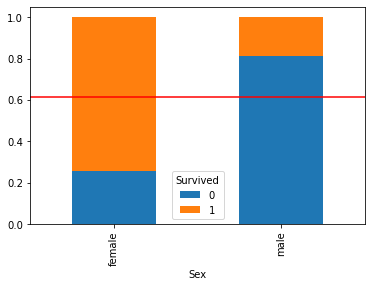

In [14]:
# 성별에 따른 생존율 집계
# pd.crosstab(x, y, normalize='index') 형태로 집계
tmp = pd.crosstab(titanic['Sex'], titanic['Survived'], normalize='index')

# 시각화
tmp.plot.bar(stacked=True)
plt.axhline(1 - titanic['Survived'].mean(), color='r')
plt.show()

> 성별에 따라 생존율의 차이가 있다.  

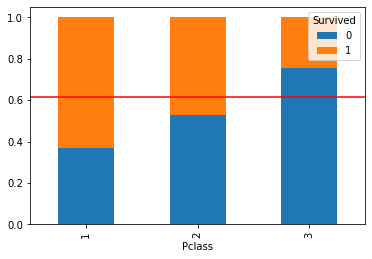

In [15]:
# Pclass에 따른 생존율 집계
tmp = pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize='index')

# 시각화
tmp.plot.bar(stacked=True)
plt.axhline(1 - titanic['Survived'].mean(), color='r')
plt.show()

> 좌석에 따라 생존율의 차이가 있다.  

* countplot : 집계 + bar plot

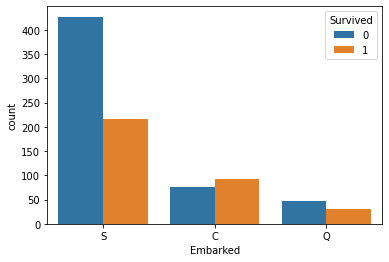

In [8]:
sns.countplot(x='Embarked', data=titanic, hue='Survived')
plt.show()

> 승선지 별 생존율의 차이가 있다.

* mosaic plot : 범주형 변수 간 비율, 양 비교
    * x축 : 단변량의 비율
    * y축 : 범주별 비율

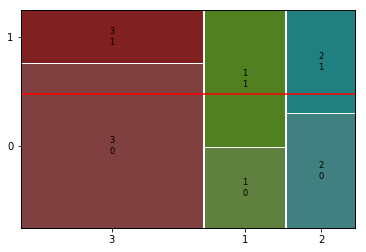

In [16]:
mosaic(titanic, ['Pclass', 'Survived'])
plt.axhline(1 - titanic['Survived'].mean(), color='r')
plt.show()

> 탑승객 중에서 3등급 탑승객 사망자 수가 비중이 많다.

* 카이제곱검정
    * 카이제곱통계량 : 기대빈도와 관측빈도 합계 사이의 차이값
    * 기대빈도 : 귀무가설이 참일 때 빈도수

In [17]:
# 먼저 집계 (이 때 행열 순서는 상관없다.)
table = pd.crosstab(titanic['Survived'], titanic['Pclass'])
print('교차표\n', table)
print('-' * 30)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0]) # 기대빈도 관측빈도 합계 사이의 차이값
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
------------------------------
카이제곱통계량 102.88898875696056
p-value 4.549251711298793e-23
기대빈도
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


In [57]:
# 여러 범주형 변수에 대해서 한꺼번에 검정 수행
vars = ['Pclass','Sex','Embarked']

for var in vars:
    table = pd.crosstab(titanic['Survived'], titanic[var])

    result = spst.chi2_contingency(table)
    print('카이제곱통계량', result[0])
    print('p-value', result[1])
    print('-' * 30)

카이제곱통계량 102.88898875696056
p-value 4.549251711298793e-23
------------------------------
카이제곱통계량 260.71702016732104
p-value 1.1973570627755645e-58
------------------------------
카이제곱통계량 26.48914983923762
p-value 1.769922284120912e-06
------------------------------


> p-value값이 0에 수렴하므로, 위 변수들 모두 생존 여부와 상관관계가 있다.  
> 'Sex', 'Pclass', 'Embarked' 순서대로 카이제곱통계량이 크고, 상관관계가 강하다.